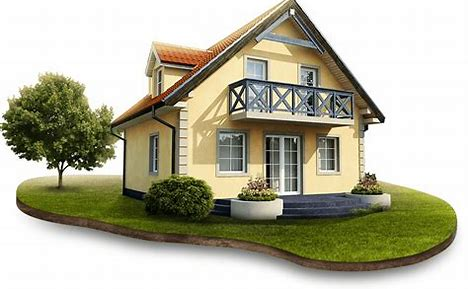



---



#**PREDICTIVE MODELING WITH LINEAR REGRESSION**



---

##<font color ='**#3e4989**'>**Comprehensive Analysis and Modeling of Housing Dataset**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load the dataset
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv('housing.data.txt', delim_whitespace=True, names=columns)

# Display the first few rows of the dataset
data.head(20)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [2]:
# Basic statistics
data.describe()

# Pairplot to visualize relationships between variables
fig = px.scatter_matrix(
    data,
    dimensions=columns,
    color='MEDV',
    title='Scatter Matrix of Housing Data',
    labels={col: col.replace('_', ' ') for col in columns},
    height=800
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Scatter Matrix of Housing Data',
    width=1200,
    height=800,
    dragmode='select',
    hovermode='closest'
)
fig.show()


In [3]:
# Correlation heatmap
correlation_matrix = data.corr()

# Create a custom color scale for the heatmap
colors = [
    [0.0, '#440154'],     # Dark purple
    [0.1111111111111111, '#482878'],  # Purple
    [0.2222222222222222, '#3e4989'],  # Bluish purple
    [0.3333333333333333, '#31688e'],  # Blue
    [0.4444444444444444, '#26828e'],  # Bluish green
    [0.5555555555555556, '#1f9e89'],  # Green
    [0.6666666666666666, '#35b779'],  # Light green
    [0.7777777777777778, '#6ece58'],  # Yellowish green
    [0.8888888888888888, '#b5de2b'],  # Yellow green
    [1.0, '#fde725']      # Bright yellow
]

heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale=colors,
    colorbar=dict(title='Correlation Coefficient')
))

heatmap.update_layout(
    title='Correlation Heatmap',
    xaxis_nticks=36,
    yaxis_nticks=36,
    width=800,
    height=800,
    margin=dict(l=100, r=100, t=100, b=100)
)

heatmap.show()


In [4]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Define features and target
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2')
print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline.fit(X_train, y_train)


Cross-validation R-squared scores: [0.78005109 0.79231329 0.75452641 0.29904458 0.78702938 0.72324517
 0.84606865 0.66835141 0.79974401 0.5362705 ]
Mean R-squared score: 0.6986644490108919


Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [6]:
# Make predictions on the training set and test set
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)


Training MSE: 21.641412753226316
Testing MSE: 24.291119474973513
Training R-squared: 0.7508856358979672
Testing R-squared: 0.668759493535632


In [7]:
# Plotting actual vs. predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_pred_test, mode='markers', name='Predicted Values', marker=dict(color='purple')))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Perfect Fit', line=dict(color='red', width=2)))

fig.update_layout(title='Actual vs. Predicted Values',
                  xaxis_title='Actual Values',
                  yaxis_title='Predicted Values')
fig.show()


In [8]:
# Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

ridge_mse_test = mean_squared_error(y_test, y_pred_ridge)
ridge_r2_test = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Testing MSE:", ridge_mse_test)
print("Ridge Regression Testing R-squared:", ridge_r2_test)

# Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

lasso_mse_test = mean_squared_error(y_test, y_pred_lasso)
lasso_r2_test = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Testing MSE:", lasso_mse_test)
print("Lasso Regression Testing R-squared:", lasso_r2_test)


Ridge Regression Testing MSE: 24.312903830491614
Ridge Regression Testing R-squared: 0.6684624359643558
Lasso Regression Testing MSE: 25.656739367167678
Lasso Regression Testing R-squared: 0.6501375183238987


In [9]:
# Plotting Ridge Regression actual vs. predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_pred_ridge, mode='markers', name='Ridge Predicted Values', marker=dict(color='green')))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Perfect Fit', line=dict(color='red', width=2)))

fig.update_layout(title='Ridge Regression Actual vs. Predicted Values',
                  xaxis_title='Actual Values',
                  yaxis_title='Predicted Values')
fig.show()

# Plotting Lasso Regression actual vs. predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_pred_lasso, mode='markers', name='Lasso Predicted Values', marker=dict(color='orange')))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Perfect Fit', line=dict(color='red', width=2)))

fig.update_layout(title='Lasso Regression Actual vs. Predicted Values',
                  xaxis_title='Actual Values',
                  yaxis_title='Predicted Values')
fig.show()


In [10]:
# Polynomial regression to analyze feature importance
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
poly_pred = poly_pipeline.predict(X_test)

# Get the feature names after polynomial feature transformation
poly_features = poly_pipeline.named_steps['poly'].get_feature_names_out(X.columns)

# Get the coefficients from the trained polynomial regression model
coefs = poly_pipeline.named_steps['lr'].coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': poly_features, 'Importance': coefs})

# Sort the feature importance DataFrame and select the top 10 features
top_features = feature_importance.nlargest(10, 'Importance')

# Plot the top 10 feature importance
fig = px.bar(top_features, x='Importance', y='Feature', orientation='h', title="Top 10 Feature Importance (Polynomial Regression)")
fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')
fig.show()


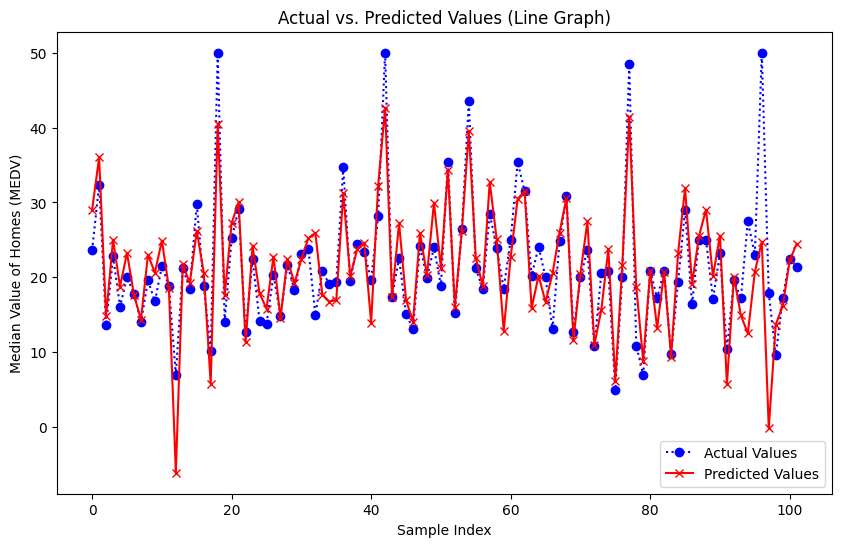

In [12]:
# Line graph for actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color="blue", marker='o', linestyle=':', label="Actual Values")
plt.plot(range(len(y_test)), y_pred_test, color="red", marker='x', linestyle='-', label="Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Median Value of Homes (MEDV)")
plt.title("Actual vs. Predicted Values (Line Graph)")
plt.legend()
plt.show()


In [13]:
# Create an interactive pie chart using Plotly
fig = px.pie(top_features, values='Importance', names='Feature',
             title='Top 10 Feature Importance (Interactive Pie Chart)',
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update the pie chart to have separated slices
fig.update_traces(pull=[0.1]*len(top_features), textinfo='percent+label')

fig.show()
